In [1]:
from sklearn.model_selection import train_test_split
import numpy as np

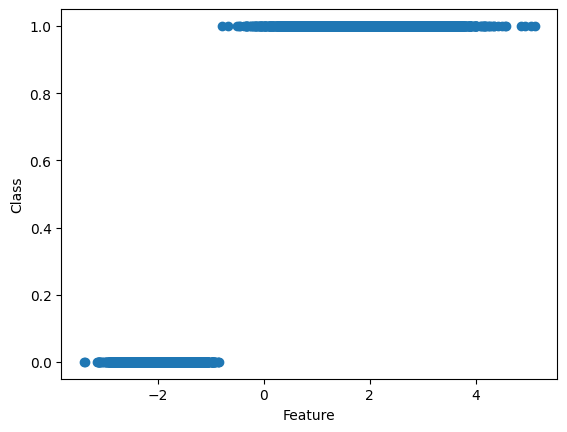

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

rows_count, col_count = 10000, 1

X, y = make_classification(n_samples=rows_count, n_features=col_count, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, flip_y=0, class_sep=2, random_state=42)

plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Class")
plt.show()

In [3]:
ones_column = np.ones((rows_count, 1))

X = np.hstack((X, ones_column))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

y_train = y_train[:, np.newaxis]

In [4]:
from utils.logistic_regression import forward, train_sigmoid_regressor

losses, parameters, gradients, current_parameters = train_sigmoid_regressor(X_train, y_train, lr=0.2, epochs=30)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 0.688198
Epoch 1, loss: 0.511949
Epoch 2, loss: 0.402187
Epoch 3, loss: 0.330206
Epoch 4, loss: 0.280250
Epoch 5, loss: 0.243840
Epoch 6, loss: 0.216226
Epoch 7, loss: 0.194600
Epoch 8, loss: 0.177218
Epoch 9, loss: 0.162944
Epoch 10, loss: 0.151012
Epoch 11, loss: 0.140887
Epoch 12, loss: 0.132185
Epoch 13, loss: 0.124624
Epoch 14, loss: 0.117989
Epoch 15, loss: 0.112120
Epoch 16, loss: 0.106888
Epoch 17, loss: 0.102193
Epoch 18, loss: 0.097957
Epoch 19, loss: 0.094112
Epoch 20, loss: 0.090607
Epoch 21, loss: 0.087398
Epoch 22, loss: 0.084447
Epoch 23, loss: 0.081724
Epoch 24, loss: 0.079203
Epoch 25, loss: 0.076862
Epoch 26, loss: 0.074682
Epoch 27, loss: 0.072646
Epoch 28, loss: 0.070740
Epoch 29, loss: 0.068952
Epoch 30, loss: 0.067270


In [5]:
from sklearn.metrics import classification_report

y_pred = forward(X_test, current_parameters)
y_pred = np.array(list(map(lambda p: 1 if p >= 0.5 else 0, y_pred)))
print(classification_report(y_test, y_pred, digits=4))
print(f'Parameters: {current_parameters[0]}')

              precision    recall  f1-score   support

           0     0.9955    1.0000    0.9978      2010
           1     1.0000    0.9955    0.9977      1990

    accuracy                         0.9978      4000
   macro avg     0.9978    0.9977    0.9977      4000
weighted avg     0.9978    0.9978    0.9977      4000

Parameters: [1.56792317 0.05131944]


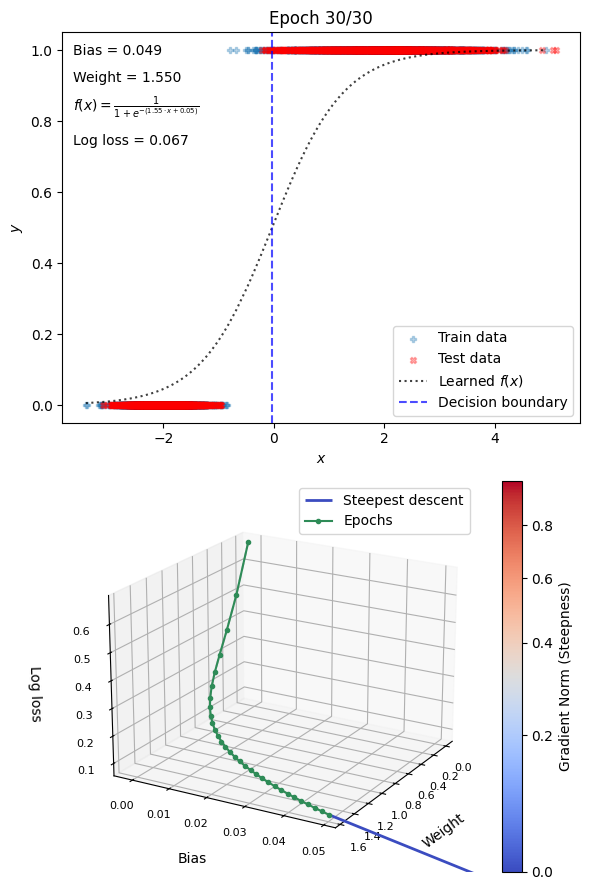

In [6]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_3D_loss
from utils.logistic_regression import plot_2D_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection='3d')

ax2.view_init(elev=20, azim=30)

def plot_text(epoch_parameters, epoch_loss, text_w1, text_b, text_fn, text_loss):
    text_w1.set_horizontalalignment('left')
    text_b.set_horizontalalignment('left')
    text_fn.set_horizontalalignment('left')
    text_loss.set_horizontalalignment('left')
    
    text_b.set_position((0.13, 0.93))
    text_w1.set_position((0.13, 0.90))
    text_fn.set_position((0.13, 0.86))
    text_loss.set_position((0.13, 0.83))
    
    text_w1.set_text(rf'Weight = {epoch_parameters[0]:.3f}')
    text_b.set_text(rf'Bias = {epoch_parameters[1]:.3f}')
    text_fn.set_text(rf'$f(x) = \frac{{1}}{{1 + e^{{-({epoch_parameters[0]:.2f} \cdot x + {epoch_parameters[1]:.2f})}}}}$')
    text_loss.set_text(f'Log loss = {epoch_loss:.3f}')

def plot_other():
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')

    ax1.legend(loc='lower right')
    
    ax2.set_xlabel(r'Weight', labelpad=10)
    ax2.set_ylabel(r'Bias', labelpad=10)
    ax2.set_zlabel('Log loss', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_2D_model,
    plot_3D_loss,
    plot_text,
    plot_other
)

In [7]:
from utils.plot_training import save_animation

experiment_name = '2D_logistic_regression_bias'
save_animation(frame_buffers, experiment_name)